## roadmap how to proceed this

📈 E-Commerce Sales Forecasting: Project Roadmap
This project follows a structured machine learning workflow to forecast daily sales based on historical transaction data. The process is divided into three main phases: data preparation, feature engineering, and model optimization.

Phase 1: Data Preparation and Exploration
The goal of this phase is to clean the raw data and transform it into a usable time-series format.

1.1. Load Data: Import the Online Retail.xlsx dataset into a pandas DataFrame.

1.2. Initial EDA (Exploratory Data Analysis): Perform an initial analysis (.info(), .describe()) to understand the data's structure, identify missing values, and spot anomalies like negative quantities.

1.3. Data Cleaning: Prepare the dataset for analysis by handling missing CustomerIDs and removing returns (transactions with negative Quantity).

1.4. Time-Series Aggregation: Create a Sales column (Quantity * UnitPrice) and aggregate the transactional data into a daily_sales time series.

Phase 2: Advanced Feature Engineering
The goal of this phase is to create intelligent features that provide the model with deep context about temporal patterns and events.

2.1. Create Baseline Features: Generate standard time-based features (dayofweek, month, year), lag features (lag_7), and rolling window statistics (rolling_mean_7).

2.2. Engineer Holiday Features:

Identify all 2011 UK public holidays using the holidays library.

Create a binary flag column (is_holiday) to mark these specific days.

Create "proximity" features (days_until_christmas, days_after_christmas) to model the buildup and cooldown around the most critical sales period.

2.3. Engineer Cyclical Features: Transform month and dayofweek using Sine/Cosine functions to help the model understand their cyclical nature (e.g., that December is next to January).

Phase 3: Model Training and Optimization
The goal of this phase is to train, tune, and evaluate a powerful machine learning model to get the most accurate forecast possible.

3.1. Final Data Preparation: Combine all engineered features into a final feature set, drop any rows with NaN values, and perform a chronological train-test split.

3.2. Model Selection: Train and evaluate baseline versions of powerful tree-based models (XGBoost and LightGBM) to select the best-performing algorithm for this dataset.

3.3. Hyperparameter Tuning: Use GridSearchCV to systematically search for the optimal settings (hyperparameters) for the champion model.

3.4. Final Evaluation: Train one final model using the best-found parameters and evaluate its performance on the unseen test set to determine the final R-squared (R²) and Mean Absolute Error (MAE).

In [ ]:

import pandas as pd  # For loading and manipulating data (like a spreadsheet)
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt # For creating basic plots
import seaborn as sns # For making beautiful, advanced plots
!pip install openpyxl




In [ ]:



file_path = '/content/Online Retail.xlsx'

df = pd.read_excel(file_path, engine='openpyxl')
print(f"✅ Data from '{file_path}' loaded successfully!")


✅ Libraries imported successfully.
✅ Data from '/content/Online Retail.xlsx' loaded successfully!


In [ ]:

print("--- Data Info (df.info()) ---")
df.info()

# --- Check the dimensions of the dataset ---
print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

--- Data Info (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

--- Dataset Shape ---
Rows: 541909, Columns: 8


In [ ]:

# Provides count, mean, standard deviation, min, max, and quartile values.
print("\n--- Numerical Data Summary (df.describe()) ---")
print(df.describe())


# Provides count, number of unique values, the most frequent value, and its frequency.
print("\n--- Categorical Data Summary (df.describe(include='object')) ---")
print(df.describe(include='object'))


--- Numerical Data Summary (df.describe()) ---
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  

--- Categorical Data Summary (df.describe(include='object')) ---
        InvoiceNo StockCode                     


--- Missing Value Count ---
Description      1454
CustomerID     135080
dtype: int64


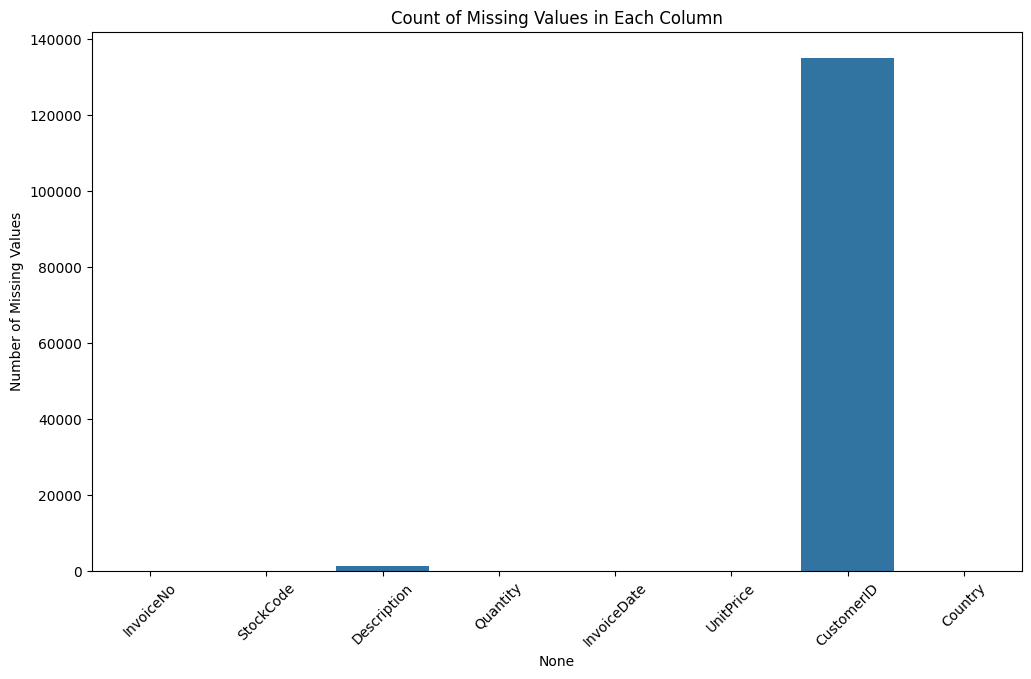

In [ ]:
# --- Count of Missing Values per Column ---
print("\n--- Missing Value Count ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Only show columns with missing values

# --- Visualize the Missing Values ---
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 7))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.xticks(rotation=45)
    plt.title('Count of Missing Values in Each Column')
    plt.ylabel('Number of Missing Values')
    plt.show()
else:
    print("\n✅ No missing values found in the dataset.")

In [ ]:
!pip install holidays
# use for which day is holiday in western culture

In [ ]:
# @title
# Import the holidays library
import holidays

# Get all public holidays for England (part of the UK) for the year 2011
# 'GB' is the country code, 'ENG' is the subdivision for England
uk_holidays_2011 = holidays.country_holidays('GB', subdiv='ENG', years=2011)

# Display the holidays that were found
print("--- UK (England) Public Holidays in 2011 ---")
for holiday_date, holiday_name in uk_holidays_2011.items():
    print(f"{holiday_date}: {holiday_name}")

# You can get just the dates into a list for later use like this:
holiday_dates = list(uk_holidays_2011.keys())
print("\n--- List of just the dates ---")
print(holiday_dates)

--- UK (England) Public Holidays in 2011 ---
2011-04-22: Good Friday
2011-05-02: May Day
2011-05-30: Spring Bank Holiday
2011-04-29: Wedding of William and Catherine
2011-01-01: New Year's Day
2011-01-03: New Year's Day (observed)
2011-12-25: Christmas Day
2011-12-27: Christmas Day (observed)
2011-12-26: Boxing Day
2011-04-25: Easter Monday
2011-08-29: Late Summer Bank Holiday

--- List of just the dates ---
[datetime.date(2011, 4, 22), datetime.date(2011, 5, 2), datetime.date(2011, 5, 30), datetime.date(2011, 4, 29), datetime.date(2011, 1, 1), datetime.date(2011, 1, 3), datetime.date(2011, 12, 25), datetime.date(2011, 12, 27), datetime.date(2011, 12, 26), datetime.date(2011, 4, 25), datetime.date(2011, 8, 29)]


In [ ]:
# why me make sales column :- We create the Sales column because it represents the target variable—the specific value our machine learning model is trying to predict.



# Create a 'Sales' column
df['Sales'] = df['Quantity'] * df['UnitPrice']


In [ ]:
# Set 'InvoiceDate' as the index to work with dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)

# Resample to a daily frequency ('D') and sum the 'Sales'
daily_sales = df['Sales'].resample('D').sum()
print("✅ Part 2: Data aggregated to daily sales successfully.")

✅ Part 2: Data aggregated to daily sales successfully.


In [ ]:
import holidays
import pandas as pd

# First, let's regenerate the holiday list to make sure we have it
uk_holidays_2011 = holidays.country_holidays('GB', subdiv='ENG', years=2011)
holiday_dates = list(uk_holidays_2011.keys())
print("Re-creating the 'features' DataFrame...")
features = pd.DataFrame(daily_sales)
features.rename(columns={'Sales': 'sales'}, inplace=True)
# --- Create the 'is_holiday' column in the 'features' DataFrame ---
# We access the date part of the 'features' DataFrame's index using .dt.date
# .isin(holiday_dates) checks if each date is in our list, returning True or False.
# .astype(int) converts True/False into 1/0.
features['is_holiday'] = features.index.to_series().dt.date.isin(holiday_dates).astype(int)

# --- Verify the result ---
# Let's look at the days that were flagged as holidays to confirm it worked.
print("--- Days flagged as public holidays in features DataFrame ---")
# We need to filter the features DataFrame by date to check specific holidays
print(features.loc[features['is_holiday'] == 1][['sales', 'is_holiday']].head())

# You can also check a specific date, like Christmas (if it's in the features index)
# Note: The 'features' DataFrame only goes up to Dec 9, 2011 based on the last output.
# So, checking Christmas 2011 directly might not show results unless your data includes it.
# Let's check a date that should be a holiday within the data range, e.g., May 2nd, 2011.
if '2011-05-02' in features.index:
    print("\n--- Verifying a specific holiday (e.g., May 2, 2011) ---")
    print(features.loc['2011-05-02'][['sales', 'is_holiday']])
else:
    print("\n--- May 2, 2011 is not in the index of the features DataFrame ---")

Re-creating the 'features' DataFrame...
--- Days flagged as public holidays in features DataFrame ---
             sales  is_holiday
InvoiceDate                   
2011-01-01     0.0           1
2011-01-03     0.0           1
2011-04-22     0.0           1
2011-04-25     0.0           1
2011-04-29     0.0           1

--- Verifying a specific holiday (e.g., May 2, 2011) ---
sales         0.0
is_holiday    1.0
Name: 2011-05-02 00:00:00, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# This code assumes your 'features' DataFrame with a datetime index already exists.

# --- Engineer 'days_until_christmas' ---
# Create a series of this year's and next year's Christmas dates
christmas_this_year = pd.to_datetime(features.index.year.astype(str) + '-12-25')
christmas_next_year = pd.to_datetime((features.index.year + 1).astype(str) + '-12-25')

# If the date is past this year's Christmas, the target is next year's Christmas
next_christmas = np.where(features.index.to_series().dt.tz_localize(None) > christmas_this_year,
                          christmas_next_year,
                          christmas_this_year)

# Calculate the difference in days
features['days_until_christmas'] = (pd.to_datetime(next_christmas) - features.index.to_series().dt.tz_localize(None)).dt.days

# --- Engineer 'days_after_christmas' ---
# Create a series of this year's and last year's Christmas dates
christmas_last_year = pd.to_datetime((features.index.year - 1).astype(str) + '-12-25')

# If the date is before this year's Christmas, the target is last year's Christmas
last_christmas = np.where(features.index.to_series().dt.tz_localize(None) < christmas_this_year,
                         christmas_last_year,
                         christmas_this_year)

# Calculate the difference in days
features['days_after_christmas'] = (features.index.to_series().dt.tz_localize(None) - pd.to_datetime(last_christmas)).dt.days

# --- Verify the results ---
print("--- Verifying Proximity Features around Christmas 2010 ---")
# Let's look at the data from Dec 20th, 2010 to Jan 3rd, 2011
verification_slice = features.loc['2010-12-20':'2011-01-03']
print(verification_slice[['sales', 'days_until_christmas', 'days_after_christmas']])

--- Verifying Proximity Features around Christmas 2010 ---
                sales  days_until_christmas  days_after_christmas
InvoiceDate                                                      
2010-12-20   24741.75                     5                   360
2010-12-21   47097.94                     4                   361
2010-12-22    6134.57                     3                   362
2010-12-23   11796.31                     2                   363
2010-12-24       0.00                     1                   364
2010-12-25       0.00                     0                     0
2010-12-26       0.00                   364                     1
2010-12-27       0.00                   363                     2
2010-12-28       0.00                   362                     3
2010-12-29       0.00                   361                     4
2010-12-30       0.00                   360                     5
2010-12-31       0.00                   359                     6
2011-01-01       

In [ ]:
features['dayofweek'] = features.index.dayofweek
features['month'] = features.index.month
features['year'] = features.index.year
features['quarter'] = features.index.quarter
features['sales_lag_7'] = features['sales'].shift(7)
features['rolling_mean_7'] = features['sales'].rolling(window=7).mean()

In [ ]:
import numpy as np

# This code assumes your 'features' DataFrame with a datetime index already exists.

# --- Engineer cyclical features for 'month' ---
# There are 12 months in a year (the period)
features['month_sin'] = np.sin(2 * np.pi * features['month'] / 12)
features['month_cos'] = np.cos(2 * np.pi * features['month'] / 12)

# --- Engineer cyclical features for 'dayofweek' ---
# There are 7 days in a week (the period)
features['dayofweek_sin'] = np.sin(2 * np.pi * features['dayofweek'] / 7)
features['dayofweek_cos'] = np.cos(2 * np.pi * features['dayofweek'] / 7)

# --- Verify the result ---
# Display the first 5 rows to see the new columns
print("--- Features DataFrame with new cyclical columns ---")
print(features[['month', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos']].head())

--- Features DataFrame with new cyclical columns ---
             month     month_sin  month_cos  dayofweek_sin  dayofweek_cos
InvoiceDate                                                              
2010-12-01      12 -2.449294e-16        1.0       0.974928      -0.222521
2010-12-02      12 -2.449294e-16        1.0       0.433884      -0.900969
2010-12-03      12 -2.449294e-16        1.0      -0.433884      -0.900969
2010-12-04      12 -2.449294e-16        1.0      -0.974928      -0.222521
2010-12-05      12 -2.449294e-16        1.0      -0.781831       0.623490


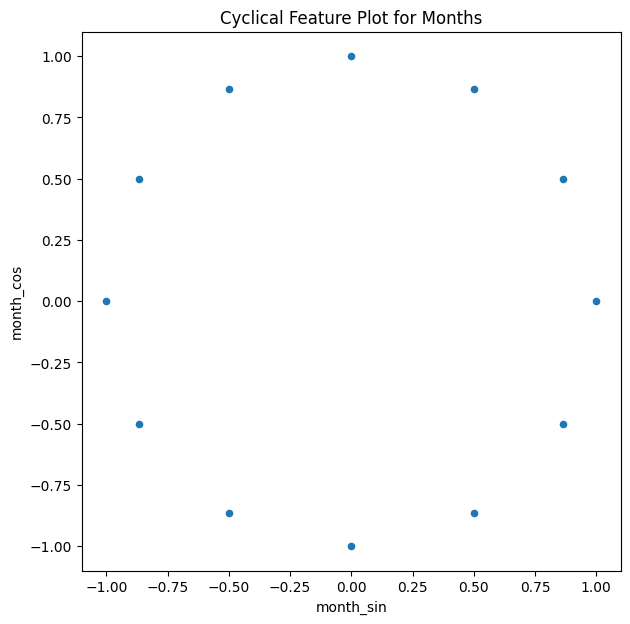

In [ ]:
# Plot the average sin/cos values for each month
features.groupby('month')[['month_sin', 'month_cos']].mean().plot(
    kind='scatter',
    x='month_sin',
    y='month_cos',
    figsize=(7, 7),
    title='Cyclical Feature Plot for Months'
).set_aspect('equal')
plt.show()

In [ ]:
# This code assumes your 'features' DataFrame now contains all the engineered features.

# Define the list of all features to be used
FEATURE_COLS = [
    # Original time-based features
    'dayofweek', 'month', 'year', 'quarter',

    # Lag and Rolling Window features
    'sales_lag_7', 'rolling_mean_7',

    # Holiday and Proximity features
    'is_holiday', 'days_until_christmas', 'days_after_christmas',

    # New cyclical features
    'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos'
]

# Define our target variable
TARGET_COL = 'sales'

# Drop any remaining rows with missing values from lag/rolling features
features.dropna(inplace=True)

print("✅ Final feature set is defined.")

✅ Final feature set is defined.


In [ ]:
import pandas as pd

# This code assumes you have a pandas Series called 'daily_sales'
# with a datetime index and the total sales for each day.

# Create a new DataFrame for our features
features = pd.DataFrame(daily_sales)
features.rename(columns={features.columns[0]: 'sales'}, inplace=True)

# --- 1. Add Lag Features ---
# These features give the model short-term memory.
features['lag_1'] = features['sales'].shift(1) # Sales from yesterday
features['lag_2'] = features['sales'].shift(2) # Sales from 2 days ago
features['lag_3'] = features['sales'].shift(3) # Sales from 3 days ago
features['lag_7'] = features['sales'].shift(7) # Sales from the same day last week

# --- 2. Add Rolling Window Features ---
# These features describe the recent trend and volatility over the last 7 days.
features['rolling_mean_7'] = features['sales'].rolling(window=7).mean()
features['rolling_median_7'] = features['sales'].rolling(window=7).median()
features['rolling_std_7'] = features['sales'].rolling(window=7).std()
features['rolling_sum_7'] = features['sales'].rolling(window=7).sum()

# --- 3. Verify the result ---
# Display the top 10 rows. Note the 'NaN' values are expected at the beginning.
print(features.head(10))

                sales     lag_1     lag_2     lag_3     lag_7  rolling_mean_7  \
InvoiceDate                                                                     
2010-12-01   58635.56       NaN       NaN       NaN       NaN             NaN   
2010-12-02   46207.28  58635.56       NaN       NaN       NaN             NaN   
2010-12-03   45620.46  46207.28  58635.56       NaN       NaN             NaN   
2010-12-04       0.00  45620.46  46207.28  58635.56       NaN             NaN   
2010-12-05   31383.95      0.00  45620.46  46207.28       NaN             NaN   
2010-12-06   53860.18  31383.95      0.00  45620.46       NaN             NaN   
2010-12-07   45059.05  53860.18  31383.95      0.00       NaN    40109.497143   
2010-12-08   44189.84  45059.05  53860.18  31383.95  58635.56    38045.822857   
2010-12-09   52532.13  44189.84  45059.05  53860.18  46207.28    38949.372857   
2010-12-10   57404.91  52532.13  44189.84  45059.05  45620.46    40632.865714   

             rolling_median

In [ ]:
import holidays

# This code assumes your 'features' DataFrame from the previous step already exists.

# --- 1. Add Time-Based Features ---
# These features help the model learn seasonal patterns.
features['dayofweek'] = features.index.dayofweek # Monday=0, Sunday=6
features['month'] = features.index.month
features['year'] = features.index.year
features['quarter'] = features.index.quarter

# --- 2. Add Holiday Feature ---
# Get a list of all UK public holidays for 2011
uk_holidays_2011 = holidays.country_holidays('GB', subdiv='ENG', years=2011)
holiday_dates = list(uk_holidays_2011.keys())

# Create a binary flag: 1 if the day is a holiday, 0 otherwise
features['is_holiday'] = features.index.to_series().dt.date.isin(holiday_dates).astype(int)

# --- 3. Verify the new columns ---
# We select a few columns, including the new ones, to display.
print("--- DataFrame with Time and Holiday Features Added ---")
print(features[['sales', 'dayofweek', 'month', 'is_holiday']].head())

# Verify that a known holiday was flagged correctly
print("\n--- Checking a known holiday (May 2, 2011) ---")
print(features.loc['2011-05-02'][['sales', 'is_holiday']])

--- DataFrame with Time and Holiday Features Added ---
                sales  dayofweek  month  is_holiday
InvoiceDate                                        
2010-12-01   58635.56          2     12           0
2010-12-02   46207.28          3     12           0
2010-12-03   45620.46          4     12           0
2010-12-04       0.00          5     12           0
2010-12-05   31383.95          6     12           0

--- Checking a known holiday (May 2, 2011) ---
sales         0.0
is_holiday    1.0
Name: 2011-05-02 00:00:00, dtype: float64


In [ ]:
# This code assumes your 'features' DataFrame is ready.

# --- 1. Drop rows with missing values ---
features.dropna(inplace=True)

# --- 2. Define Features (X) and Target (y) ---
TARGET_COL = 'sales'
# Use all columns except the target as features
FEATURE_COLS = [col for col in features.columns if col != TARGET_COL]

# --- 3. Perform a chronological train-test split ---
split_date = '2011-10-01'
train = features.loc[features.index < split_date]
test = features.loc[features.index >= split_date]

X_train = train[FEATURE_COLS]
y_train = train[TARGET_COL]
X_test = test[FEATURE_COLS]
y_test = test[TARGET_COL]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (297, 13)
Testing data shape: (70, 13)


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import time

# This assumes you have X_train and y_train ready.

# 1. Define the "Grid" of hyperparameters to test
param_grid = {
    'n_estimators': [500, 1000],          # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],   # How quickly the model learns
    'max_depth': [3, 5, 7],               # The complexity of each tree
    'colsample_bytree': [0.7, 1.0]        # Fraction of features used per tree
}

# 2. Set up the GridSearchCV tool
# We are optimizing the XGBoost model here.
# cv=3 means 3-fold cross-validation.
# scoring='r2' tells it to find the settings that maximize the R-squared score.
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror'),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# 3. Run the Search
print("--- Starting Grid Search for XGBoost ---")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print(f"--- Grid Search Complete ---")
print(f"Total time taken: {((end_time - start_time) / 60):.2f} minutes")

--- Starting Grid Search for XGBoost ---
Fitting 3 folds for each of 36 candidates, totalling 108 fits
--- Grid Search Complete ---
Total time taken: 0.85 minutes


In [ ]:
# Print the best combination of parameters found
print("\n--- Best Hyperparameters Found ---")
print(grid_search.best_params_)

# Print the best R-squared score achieved during the search
print("\n--- Best R-squared Score (from cross-validation) ---")
print(f"{grid_search.best_score_:.2f}")


--- Best Hyperparameters Found ---
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}

--- Best R-squared Score (from cross-validation) ---
0.59


In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import time

# 1. Define the "Grid" of hyperparameters to test
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 62] # Specific to LightGBM
}

# 2. Set up the GridSearchCV tool
grid_search = GridSearchCV(
    estimator=lgb.LGBMRegressor(objective='regression'),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# 3. Run the Search
print("\n--- Starting Grid Search for LightGBM ---")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print(f"--- Grid Search Complete ---")
print(f"Total time taken: {((end_time - start_time) / 60):.2f} minutes")


# 4. Find the Best Model
print("\n--- Best Hyperparameters Found ---")
print(grid_search.best_params_)

print("\n--- Best R-squared Score (from cross-validation) ---")
print(f"{grid_search.best_score_:.2f}")

In [ ]:
# @title
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Define the best parameters you found
best_params = {
    'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 1000,
    'num_leaves': 15
}

# 2. Train the final model with these settings
final_model = lgb.LGBMRegressor(objective='regression', **best_params)
final_model.fit(X_train, y_train)

# 3. Evaluate on the test set
final_predictions = final_model.predict(X_test)
final_r2 = r2_score(y_test, final_predictions)
final_mae = mean_absolute_error(y_test, final_predictions)

print("--- Final Champion Model Performance ---")
print(f"Final R-squared (R²): {final_r2:.2f}")
print(f"Final Mean Absolute Error (MAE): {final_mae:.2f}")

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# This code assumes you have run GridSearchCV and have the grid_search object,
# along with X_train, y_train, X_test, and y_test.

# --- 1. Get the Best Parameters ---
# The best settings are stored in the .best_params_ attribute
best_params = grid_search.best_params_
print(f"--- Using the best parameters found: {best_params} ---")

# --- 2. Train the Champion Model ---
# Create a new model instance with the best parameters
champion_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)

print("\nTraining the final champion model on the full training data...")
champion_model.fit(X_train, y_train)
print("✅ Champion model trained successfully.")

# --- 3. Evaluate on the Test Set ---
# Make final predictions on the unseen test data
final_predictions = champion_model.predict(X_test)

# Calculate final performance metrics
final_r2 = r2_score(y_test, final_predictions)
final_mae = mean_absolute_error(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

print("\n--- Final Model Performance on Test Set ---")
print(f"R-squared (R²) Score: {final_r2:.2f}")
print(f"Mean Absolute Error (MAE): {final_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {final_rmse:.2f}")

--- Using the best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500} ---

Training the final champion model on the full training data...
✅ Champion model trained successfully.

--- Final Model Performance on Test Set ---
R-squared (R²) Score: 0.59
Mean Absolute Error (MAE): 10639.29
Root Mean Squared Error (RMSE): 15446.04


## i know r-squared is not much good but still i am learning mode so when i understand lots of concepts in ml, dl so i can try one more time to imporve this.
